In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as sc
import zipfile
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

**WHAT DATASET HAS**

In [ ]:
path = '/content/drive/MyDrive/data/fraunhofer_eas_dataset_for_unbalance_detection_v1.zip'

with zipfile.ZipFile(path, 'r') as f:
    with f.open('0D.csv', 'r') as c:
        data0D = pd.read_csv(c)
    with f.open('0E.csv', 'r') as c:
        data0E = pd.read_csv(c)
    with f.open('1D.csv', 'r') as c:
        data1D = pd.read_csv(c)
    with f.open('1E.csv', 'r') as c:
        data1E = pd.read_csv(c)
    with f.open('2D.csv', 'r') as c:
        data2D = pd.read_csv(c)
    with f.open('2E.csv', 'r') as c:
        data2E = pd.read_csv(c)
    with f.open('3D.csv', 'r') as c:
        data3D = pd.read_csv(c)
    with f.open('3E.csv', 'r') as c:
        data3E = pd.read_csv(c)
    with f.open('4D.csv', 'r') as c:
        data4D = pd.read_csv(c)
    with f.open('4E.csv', 'r') as c:
        data4E = pd.read_csv(c)

In [ ]:
#From the dataset, Since the tutorial said that the first about 10 seconds are noisy due to the warm-up phase of the measuring device, the first 50000 samples are skipped.
skip = 50000
# (“data0” = no unbalance, ... “data4” = strong unbalance), 
#  dataset (“D” = development or training, “E” = evaluation)

data0D = data0D['Vibration_1'].iloc[skip:,:]
data1D = data1D.iloc[skip:,:]
data2D = data2D.iloc[skip:,:]
data3D = data3D.iloc[skip:,:]
data4D = data4D.iloc[skip:,:]

data0E = data0E.iloc[skip:,:]
data1E = data1E.iloc[skip:,:]
data2E = data2E.iloc[skip:,:]
data3E = data3E.iloc[skip:,:]
data4E = data4E.iloc[skip:,:]

In [ ]:
data0E

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
50000,4.0,1026.9841,0.020367,0.033482,0.026215
50001,4.0,1026.9841,0.019192,0.034207,0.026509
50002,4.0,1026.9841,0.016861,0.033402,0.026835
50003,4.0,1026.9841,0.017999,0.033278,0.026187
50004,4.0,1026.9841,0.019349,0.034159,0.025806
...,...,...,...,...,...
6893562,8.1,1959.3277,0.000098,0.000602,0.003182
6893563,8.1,1959.3277,0.000110,0.000299,0.004029
6893564,8.1,1959.3277,0.000626,0.000457,0.003378
6893565,8.1,1959.3277,0.001309,0.000594,0.003142


In [ ]:
data0E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06
mean,6.061296e+00,1.490888e+03,5.884835e-04,7.014949e-04,3.261529e-03
std,1.205810e+00,2.565084e+02,6.512743e-03,8.192315e-03,2.597875e-03
min,4.000000e+00,1.025974e+03,-8.161068e-02,-1.398516e-01,-2.267003e-02
25%,5.000000e+00,1.273534e+03,-1.417399e-03,-1.353025e-03,2.033710e-03
50%,6.100000e+00,1.486869e+03,5.376339e-04,6.043911e-04,3.211498e-03
75%,7.100000e+00,1.710401e+03,2.691746e-03,2.683401e-03,4.520416e-03
max,8.100000e+00,1.959616e+03,8.706570e-02,1.345038e-01,2.895355e-02


In [ ]:
data1E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.855907e+06,6.855906e+06,6.855907e+06,6.855907e+06,6.855906e+06
mean,6.057587e+00,1.493837e+03,7.191154e-04,5.260430e-04,2.712437e-03
std,1.207888e+00,2.570590e+02,7.419861e-03,9.645050e-03,2.971395e-03
min,4.000000e+00,1.027829e+03,-9.434462e-02,-1.786995e-01,-2.642393e-02
25%,5.000000e+00,1.272029e+03,-1.757145e-03,-2.371073e-03,1.257658e-03
50%,6.100000e+00,1.489203e+03,6.651878e-04,4.220009e-04,2.665520e-03
75%,7.100000e+00,1.715732e+03,3.380776e-03,3.376007e-03,4.233122e-03
max,8.100000e+00,1.963544e+03,8.256197e-02,1.567221e-01,2.792954e-02


In [ ]:
data2E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.839471e+06,6.839471e+06,6.839471e+06,6.839471e+06,6.839471e+06
mean,6.060075e+00,1.488078e+03,5.806488e-04,6.830184e-04,2.678412e-03
std,1.205138e+00,2.601095e+02,5.762876e-03,8.047543e-03,3.044139e-03
min,4.000000e+00,1.020881e+03,-7.078528e-02,-1.761472e-01,-2.329230e-02
25%,5.000000e+00,1.268130e+03,-1.924038e-03,-1.823902e-03,9.953976e-04
50%,6.100000e+00,1.483020e+03,4.577637e-04,6.270409e-04,2.573729e-03
75%,7.100000e+00,1.704909e+03,2.825260e-03,3.150701e-03,4.198551e-03
max,8.100000e+00,3.015113e+03,7.471442e-02,1.729095e-01,3.138661e-02


In [ ]:
data3E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.851759e+06,6.851759e+06,6.851759e+06,6.851759e+06,6.851759e+06
mean,6.058832e+00,1.486687e+03,7.067166e-04,8.498635e-04,3.546051e-03
std,1.207192e+00,2.559053e+02,7.872058e-03,9.873148e-03,4.272297e-03
min,4.000000e+00,1.020612e+03,-9.141207e-02,-1.535034e-01,-2.426028e-02
25%,5.000000e+00,1.267206e+03,-2.791882e-03,-2.220869e-03,1.013279e-03
50%,6.100000e+00,1.483487e+03,6.437302e-04,7.307529e-04,3.479719e-03
75%,7.100000e+00,1.706873e+03,4.167557e-03,3.725290e-03,6.098747e-03
max,8.100000e+00,1.955337e+03,8.481383e-02,1.315105e-01,3.637671e-02


In [ ]:
data4E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06
mean,6.055147e+00,1.492996e+03,6.847208e-04,6.238618e-04,2.814346e-03
std,1.209247e+00,2.578084e+02,1.476320e-02,1.838645e-02,7.703137e-03
min,4.000000e+00,1.027846e+03,-1.012993e-01,-2.115834e-01,-3.185988e-02
25%,5.000000e+00,1.271982e+03,-6.102324e-03,-6.538630e-03,-1.285076e-03
50%,6.100000e+00,1.487173e+03,5.400181e-04,5.018711e-04,2.655983e-03
75%,7.100000e+00,1.713392e+03,7.725954e-03,7.796287e-03,7.050037e-03
max,8.100000e+00,1.963769e+03,1.093101e-01,1.752233e-01,3.780127e-02


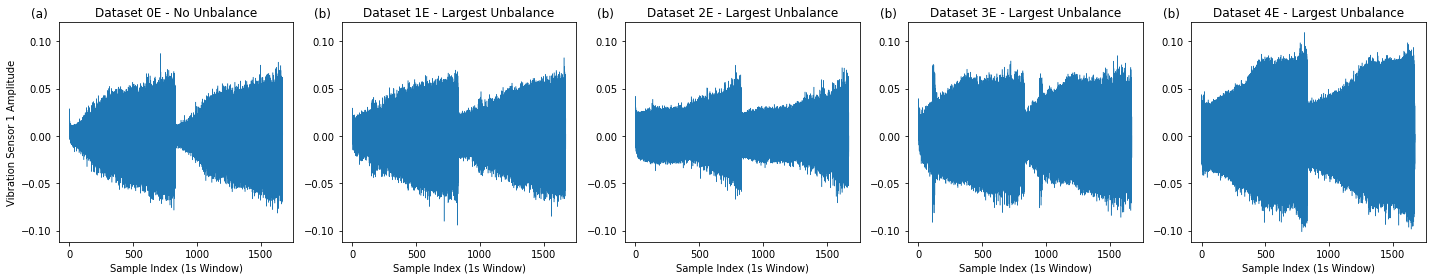

In [ ]:
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(1, 5, 1,  title="Dataset 0E - No Unbalance")
ax1.plot(np.arange(len(data0E['Vibration_1']))/4096, data0E['Vibration_1'], lw=0.5)
ax1.set_xlabel("Sample Index (1s Window)")
ax1.set_ylabel("Vibration Sensor 1 Amplitude")
ax1.text(-300, 0.125,"(a)", fontsize=12)
ax2 = plt.subplot(1, 5, 2,title="Dataset 1E - Largest Unbalance", sharey=ax1)
ax2.plot(np.arange(len(data1E['Vibration_1']))/4096, data1E['Vibration_1'], lw=0.5)
ax2.set_xlabel("Sample Index (1s Window)")
ax2.text(-300, 0.125,"(b)", fontsize=12)
ax3 = plt.subplot(1, 5, 3,  title="Dataset 2E - Largest Unbalance", sharey=ax1)
ax3.plot(np.arange(len(data2E['Vibration_1']))/4096, data2E['Vibration_1'], lw=0.5)
ax3.set_xlabel("Sample Index (1s Window)")
ax3.text(-300, 0.125,"(b)", fontsize=12)
ax4 = plt.subplot(1, 5, 4,  title="Dataset 3E - Largest Unbalance", sharey=ax1)
ax4.plot(np.arange(len(data3E['Vibration_1']))/4096, data3E['Vibration_1'], lw=0.5)
ax4.set_xlabel("Sample Index (1s Window)")
ax4.text(-300, 0.125,"(b)", fontsize=12)
ax5 = plt.subplot(1, 5, 5,  title="Dataset 4E - Largest Unbalance", sharey=ax1)
ax5.plot(np.arange(len(data4E['Vibration_1']))/4096, data4E['Vibration_1'], lw=0.5)
ax5.set_xlabel("Sample Index (1s Window)")
ax5.text(-300, 0.125,"(b)", fontsize=12)
plt.tight_layout()
fig.savefig("Fig.4_ab.png", dpi=200)
plt.show()

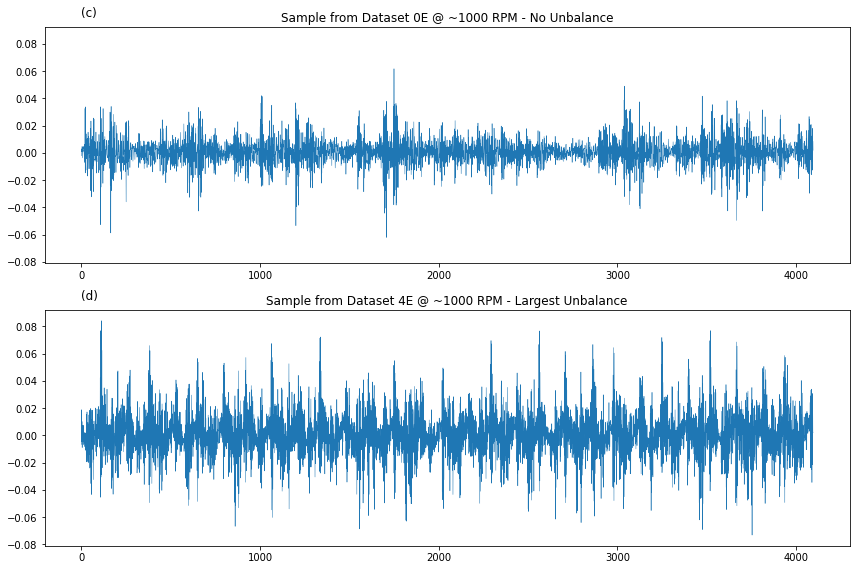

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4, title="Sample from Dataset 0E @ ~1000 RPM - No Unbalance")
ax1.plot(np.arange(4096), data0E['Vibration_1'].loc[2950000:2950000+4095], lw=0.5)
ax1.text(0, 0.1,"(c)", fontsize=12)
ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=4, title="Sample from Dataset 4E @ ~1000 RPM - Largest Unbalance",
                        sharex=ax1, sharey=ax1)
ax2.plot(np.arange(4096), data4E['Vibration_1'].loc[2950000:2950000+4095], lw=0.5)
ax2.text(0, 0.1,"(d)", fontsize=12)
plt.tight_layout()
fig.savefig("Fig.4_cd.png", dpi=200)
plt.show()

In [ ]:
def split_window(arr,nperseg): # overlap = nperseg//2
    length = len(arr)
    n = int(np.floor(length/nperseg))
    arr = arr[:n*nperseg]
    brr  = arr.copy()
    brr[:-int(nperseg/2)]= arr[int(nperseg/2):]
    arr = arr.reshape(n,nperseg)
    brr = brr.reshape(n,nperseg)
    c =np.hstack([arr,brr])
    c=c.reshape(2*n,nperseg)
    return c[:-1]


In [ ]:
window = 4096

n = int(np.floor(len(data0E['Vibration_1'])/window))
# print((data0E['Vibration_1'][:int(n)*window].values).shape)
X_0E = data0E['Vibration_1'][:int(n)*window].values.reshape((n, window))
n = int(np.floor(len(data4E['Vibration_1'])/window))
X_4E = data4E['Vibration_1'][:int(n)*window].values.reshape((n, window))

X_0E_fft = np.abs(np.fft.rfft(X_0E, axis=1))[:,:int(window/2)]
X_4E_fft = np.abs(np.fft.rfft(X_4E, axis=1))[:,:int(window/2)]
X_0E_fft[:,0]=0
X_4E_fft[:,0]=0
print(X_4E.shape)
print(X_4E_fft.shape)

(1675, 4096)
(1675, 2048)


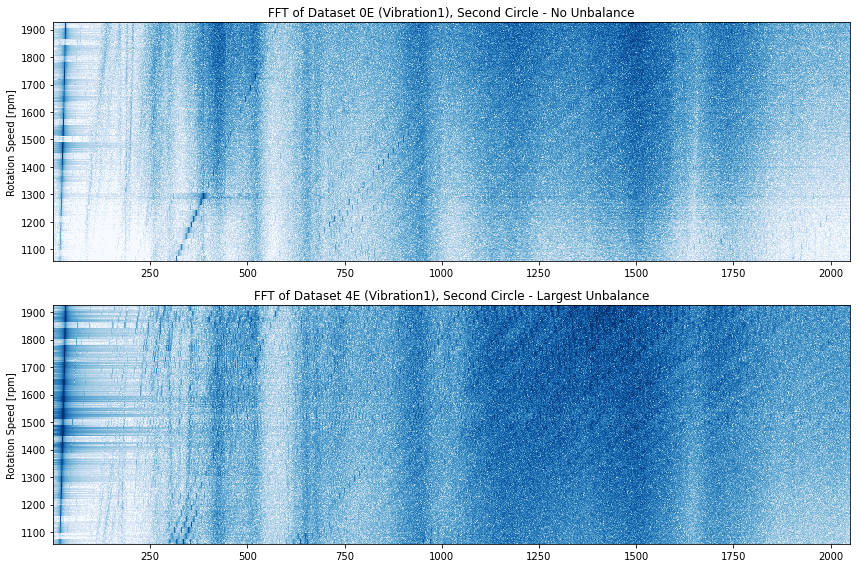

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4, title="FFT of Dataset 0E (Vibration1), Second Circle - No Unbalance")
ax1.pcolorfast(np.arange(1,2050), np.linspace(1057.,1926.2,len(X_0E_fft[831:1670,:])), X_0E_fft[831:1670,:],
           cmap="Blues",norm=LogNorm(vmin=0.005, vmax=5.0))
ax1.set_ylabel("Rotation Speed [rpm]")
ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=4, title="FFT of Dataset 4E (Vibration1), Second Circle - Largest Unbalance")
ax2.pcolorfast(np.arange(1,2050), np.linspace(1057.,1926.2,len(X_4E_fft[831:1670,:])), X_4E_fft[831:1670,:],
           cmap="Blues",norm=LogNorm(vmin=0.005, vmax=5.0))
ax2.set_ylabel("Rotation Speed [rpm]")
plt.tight_layout()
fig.savefig("Fig.4_ij.png", dpi=200)
plt.show()

In [ ]:
window = 4096
from scipy import signal
X_0E = split_window(data0E['Vibration_1'].values,window)
X_1E = split_window(data1E['Vibration_1'].values,window)
X_2E = split_window(data2E['Vibration_1'].values,window)
X_3E = split_window(data3E['Vibration_1'].values,window)
X_4E = split_window(data4E['Vibration_1'].values,window)

# apply FFT for each window using Hann Window (wavelet transform)
(f,X_0E_fft)= signal.welch(X_0E, fs=4096, nperseg=4096)
(f,X_1E_fft)= signal.welch(X_1E, fs=4096, nperseg=4096)
(f,X_2E_fft)= signal.welch(X_2E, fs=4096, nperseg=4096)
(f,X_3E_fft)= signal.welch(X_3E, fs=4096, nperseg=4096)
(f,X_4E_fft)= signal.welch(X_4E, fs=4096, nperseg=4096)


print(X_4E.shape)
print(X_4E_fft.shape)

(3349, 4096)
(3349, 2049)


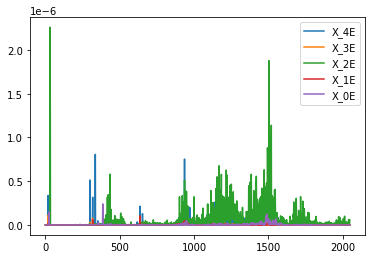

In [ ]:
plt.plot(np.abs(X_4E_fft[-1]), label = 'X_4E')
plt.plot(np.abs(X_3E_fft[-1]), label = 'X_3E')
plt.plot(np.abs(X_2E_fft[-1]), label = 'X_2E')
plt.plot(np.abs(X_1E_fft[-1]), label = 'X_1E')
plt.plot(np.abs(X_0E_fft[-1]), label = 'X_0E')
plt.legend()
plt.savefig("Fig.4_ef.png", dpi=200)

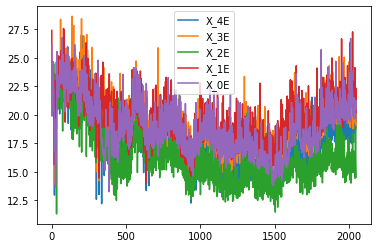

In [ ]:
# take log10
X_0E_fft = np.log10(np.power(X_0E_fft,2))
X_1E_fft = np.log10(np.power(X_1E_fft,2))
X_2E_fft = np.log10(np.power(X_2E_fft,2))
X_3E_fft = np.log10(np.power(X_3E_fft,2))
X_4E_fft = np.log10(np.power(X_4E_fft,2))
plt.plot(np.abs(X_4E_fft[-1]), label = 'X_4E')
plt.plot(np.abs(X_3E_fft[-1]), label = 'X_3E')
plt.plot(np.abs(X_2E_fft[-1]), label = 'X_2E')
plt.plot(np.abs(X_1E_fft[-1]), label = 'X_1E')
plt.plot(np.abs(X_0E_fft[-1]), label = 'X_0E')
plt.legend()
plt.savefig("Fig.4_gh.png", dpi=200)

In [ ]:
X_0E_fft = X_0E_fft*np.conj(X_0E_fft)
X_1E_fft = X_1E_fft*np.conj(X_1E_fft)
X_2E_fft = X_2E_fft*np.conj(X_2E_fft)
X_3E_fft = X_3E_fft*np.conj(X_3E_fft)
X_4E_fft = X_4E_fft*np.conj(X_4E_fft)

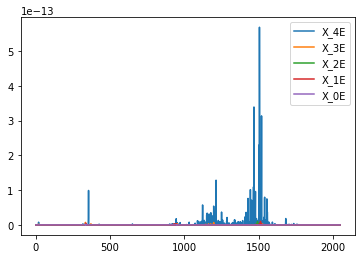

In [ ]:


plt.plot(np.real(X_4E_fft[100]), label = 'X_4E')
plt.plot(np.real(X_3E_fft[100]), label = 'X_3E')
plt.plot(np.real(X_2E_fft[100]), label = 'X_2E')
plt.plot(np.real(X_1E_fft[100]), label = 'X_1E')
plt.plot(np.real(X_0E_fft[100]), label = 'X_0E')
plt.legend()
plt.savefig("Fig.4_gh.png", dpi=200)